<div class="alert alert-block alert-info">
<font size="5">
<center><b>ИССЛЕДОВАНИЕ ОБЪЯВЛЕНИЙ О ПРОДАЖЕ КВАРТИР</b></center>
</font>
    </div> 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<span class="mark">**Оглавление:**</span>

[1. Изучение данных](#num1)

* Скачать датасет
* Загрузите данные из файла в датафрейм.
* Изучите общую информацию о полученном датафрейме.
* Постройте общую гистограмму для всех столбцов таблицы. 

[2. Предобработка данных](#num2)

В данном разделе нам предстоит сделать следующие шаги:
* оставим в таблице необходимые для анализа столбцы;
* проверяем и корректируем данные в каждом столбце на предмет:
      > тип столбца => преобразуем в нужный тип
      > пустые значения => просавляем "0"/находим median или mean/ удаляем
      > уникальные значения => корректное написание значений/ явные/неявные дубликаты 
      > аномалии => восстанавливаем корректное значение/удаляем редкие и выбивающие значения      

[3. Посчитаю и добавлю в таблицу новые столбцы](#num3)

* рассчитаю и добавлю новые столбца, а именно:
    - `'price_per_metr'` цена одного квадратного метра;
    - `'first_day_exposition_of_week'`день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - `'first_exposition_month'` месяц публикации объявления;
    - `first_exposition_year` год публикации объявления;
    - `type_of_floor` тип этажа квартиры (значения — «первый», «последний», «другой»);
    - `distance_to_center` расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

[4. Исследовательский анализ данных](#num4)
* изучу, построю гистограммы и опишу все мои наблюдения  для каждого из этих параметров, а именно:
   * общая площадь;
   * жилая площадь;
   * площадь кухни;
   * цена объекта;
   * количество комнат;
   * высота потолков;
   * этаж квартиры;
   * тип этажа квартиры («первый», «последний», «другой»);
   * общее количество этажей в доме;
   * расстояние до центра города в метрах;
   * расстояние до ближайшего аэропорта;
   * расстояние до ближайшего парка;
   * день и месяц публикации объявления.
 
* проанализирую столбец days_exposition(срок продажи):
* определю факторы влияния на общую(полную) стоимость объекта через корреляцию следующих параметров:   
* проанализирую столбец locality_name   

[5. Вывод](#num5)

# Выполнение проекта

<a name="num1"></a>
## Изучение данных

In [1]:
# Подключаем библиотеки 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import math
import seaborn as sns

In [2]:
# Загружаем датасет

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Изучаем таблицу
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Изучаем столбцы и их типы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Просмотр сводной статистики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [6]:
# Проверим наличие пропусков в каждом столбце(%)
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('BuPu') 

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

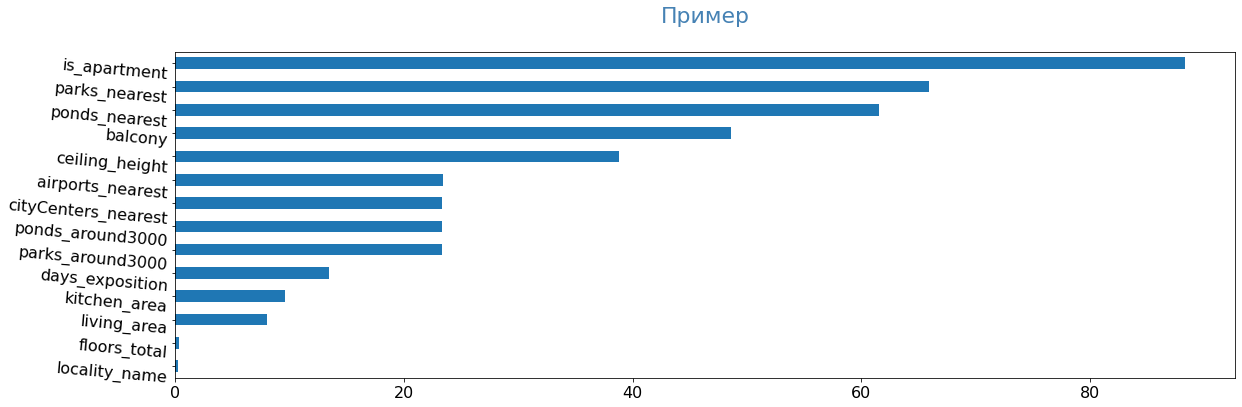

In [8]:
pass_value_barh(data)

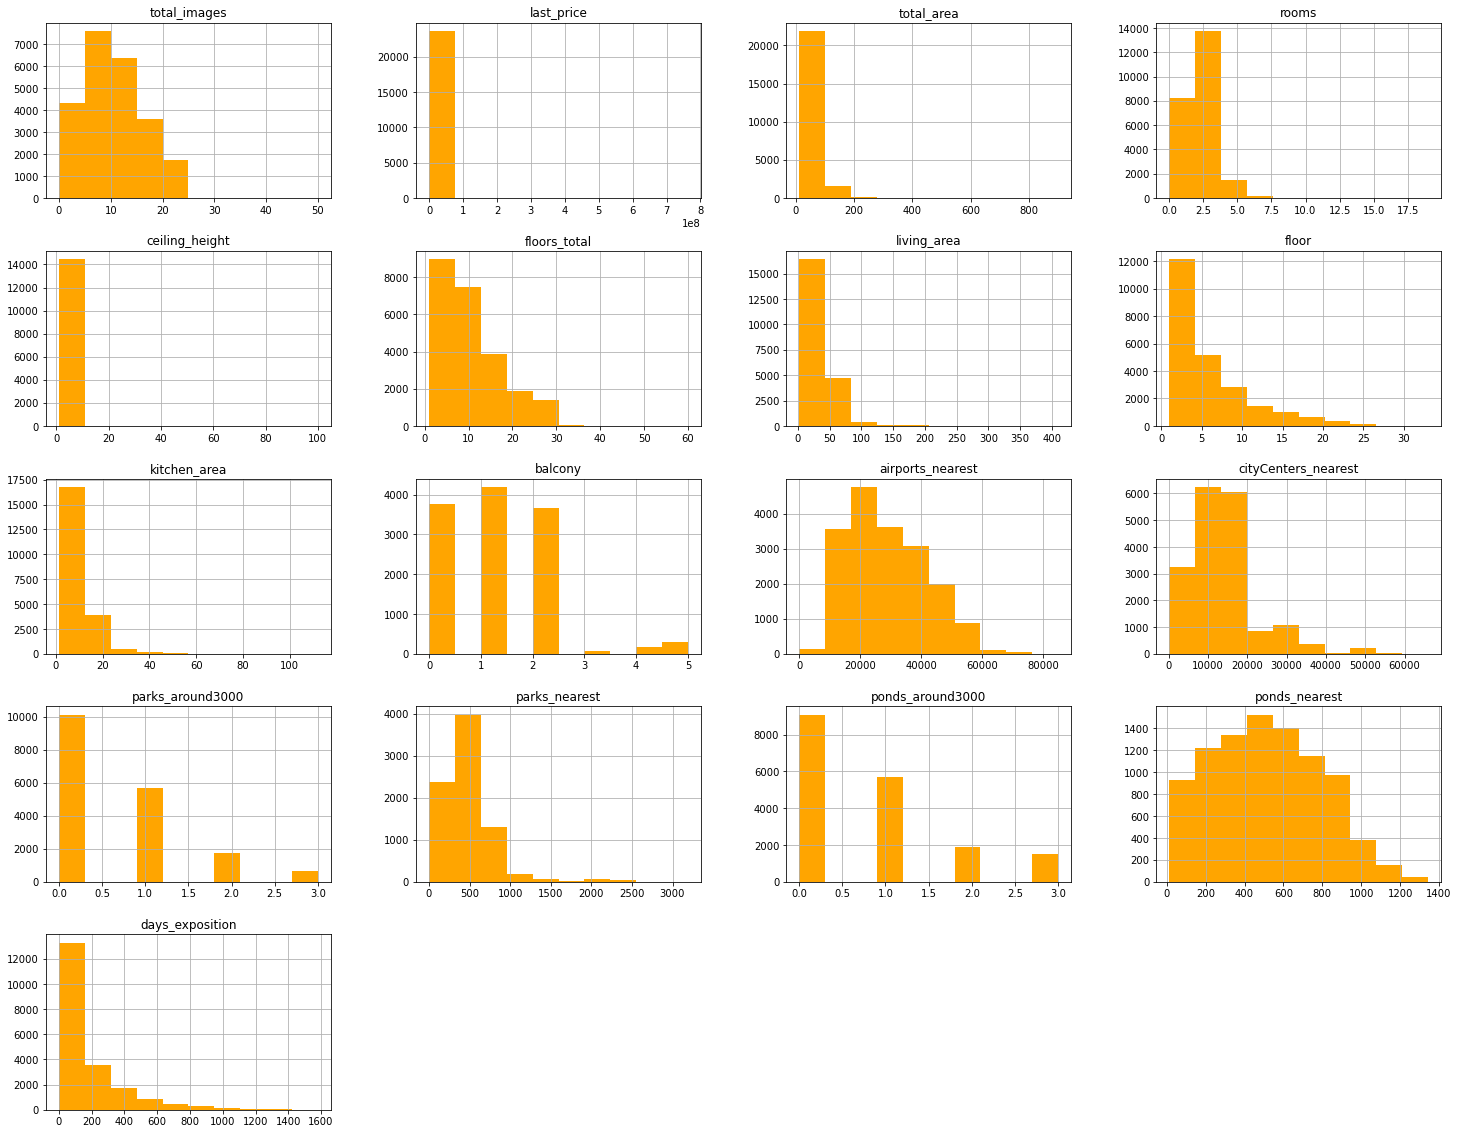

In [9]:
# Постоим гистограммы для каждой колонки

params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
data.hist(figsize=(25, 20), color='orange')
plt.show()


**`ВЫВОД`**: 
<div style="border:solid green 2px; padding: 20px"> 

В исходном датасете 23699 строк и 22 столбца. 
После того, как изучили датасет, выявили следующие первичные отклонения:
1) `first_day_exposition`- не соответствует тип колонки object\
2) `ceiling_height`- <font color='red'>**39%**</font> пустых значений\
3) `living_area` - 8% пустых значений\
4) `is_apartment` - <font color='red'>**88%**</font> пустых значений, не соответствует тип колонки object\
5) `balcony`- <font color='red'>**49%**</font> пустых значений, не соответствует тип колонки float64\
6) `kitchen_area`- 10% пустых значений \
7) `airports_nearest| cityCenters_nearest | parks_around3000 | ponds_around3000` - по **23%** пустых значений \
8) `parks_nearest` - <font color='red'>**66%**</font> пустых значений\
9) `ponds_nearest` - <font color='red'>**62%**</font> пустых значений\
10)`days_exposition` - **13%** пустых значений\не соответствует тип колонки float64 \
11)`floors_total`- не соответствует тип колонки float64\
12)`locality_name` - неявные дубликаты
</div>

<a name="num2"></a>
## Предобработка данных

В данном разделе нам предстоит сделать следующие шаги:
* оставим в таблице необходимые для анализа столбцы;
* проверяем и корректируем данные в каждом столбце на предмет:
      > тип столбца => преобразуем в нужный тип
      > пустые значения => просавляем "0"/находим median или mean/ удаляем
      > уникальные значения => корректное написание значений/ явные/неявные дубликаты 
      > аномалии => восстанавливаем корректное значение/удаляем редкие и выбивающие значения
      
Без проведения очистки данных будет сложно провести дополнительный анализ.

Чтобы преобразовать типы данных в pandas, используем способы:

* метод astype(), чтобы принудительно задать тип данных.
* метод fillna(), заполняем пустые значения 
* функцию pd.to_datetime(), преобразование отдельных столбцов месяца, дня и года 

**Перед обработкой данных выведим на экран исходные данные, чтобы понимать дальнейшие изменения.**

In [10]:
# Количество строк
print('Количество строк:', len(data))

Количество строк: 23699


### Обработка столцов 


#### <code style="background:lightblue;color:black">first_day_exposition</code>
Тип колонки object меняем на datetime\, чтобы мы смогли определить день недели, месяц/год публикайии, срок продажи квартиры(добавим столбец day_exposition), убрали мин/сек, тк они не отражены.

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [12]:
# Проверяем пустые значения
data['first_day_exposition'].isna().sum()

0

#### <code style="background:lightblue;color:black">is_apartment</code>
Тип колонки object на bool- булевое значение, Nan изменили на False, тк обратное не указано в таблице.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

#### <code style="background:lightblue;color:black">balcony</code>
Тип колонки float64 на int64 - целое число и запомняем пустое значение на 0, тк продавец не указал обратное.

In [14]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

#### <code style="background:lightblue;color:black">floors_total</code>

Тип колонки float64 на int64 - целое число и пустые значения заполняем медианной.

Пустых значений- менее 1%(незначительно) или 86 значений.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* поставить медианное значение 
      
Вывод: Удаляем и меняем тип колонки float64 на int64.

**Общее количество этажей в доме по имеющимся данным узнать нельзя. 
Средним значением заполнять нет смысла, т.к. значение floor может оказаться больше floors_total. 
Логичнее эти данные удалить.** 
    

In [15]:
# Удалим пропуски
total_floor_isna = data['floors_total'].isna() 
data[total_floor_isna]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,...,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,...,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,...,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,...,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [16]:
# Просмотр сводной статистики
data['floors_total'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23699.0,11849.000000,6841.456351,0.0,2369.8,11849.0,14218.8,16588.6,18958.4,21328.2,22513.1,23461.02,23698.0
floors_total,23613.0,10.673824,6.597173,1.0,5.0,9.0,10.0,13.0,16.0,22.0,25.0,26.00,60.0


In [17]:
# Посчитаем количество домов, где этажей в доме более 40
floors_more40 = data.query('floors_total > 40')
print('Всего домов, где кол-во этажей больше 40:', len(floors_more40))

Всего домов, где кол-во этажей больше 40: 2


In [18]:
# Удалим экстремумы
data = data[(data['floors_total'] < 40)]
# согласно статистике, в Спб нет домов выше 40 этажей

In [19]:
#  Заменим тип колонки float64 на int64.
data['floors_total'] = data['floors_total'].astype('int')

In [20]:
# Проверим выбросы
data.floors_total.value_counts().to_frame()

,floors_total
5,5788
9,3761
16,1376
12,1362
4,1200
10,1174
25,1075
6,914
17,833
3,668


In [21]:
# Проверим нет ли этаже выше этажности дома
check_floor = data['floors_total'] < data['floor']
data.loc[check_floor]
# Таких этажей нет, значит уловие по пропускам оставим    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [22]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23611 non-null  int64         
 1   last_price            23611 non-null  float64       
 2   total_area            23611 non-null  float64       
 3   first_day_exposition  23611 non-null  datetime64[ns]
 4   rooms                 23611 non-null  int64         
 5   ceiling_height        14493 non-null  float64       
 6   floors_total          23611 non-null  int64         
 7   living_area           21741 non-null  float64       
 8   floor                 23611 non-null  int64         
 9   is_apartment          23611 non-null  bool          
 10  studio                23611 non-null  bool          
 11  open_plan             23611 non-null  bool          
 12  kitchen_area          21380 non-null  float64       
 13  balcony         

In [23]:
# check
data.shape

(23611, 22)

In [24]:
check_floor = data['floors_total'] < data['floor']
data.loc[check_floor]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [25]:
data['floors_total'].isna().sum()

0

#### <code style="background:lightblue;color:black">days_exposition</code>

Пустых значений- 13%(значительно).\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* поставить медианное значение;
* поставить медианное значение и удалить экстремумы, чтобы они не влияли на показатели.
      
Вывод: меняем тип колонки float64 на int64 и пустые значения меняем на 0(означает, что квартира еще не продана). Кроме этого, оставляем выбросы, тк они могут быть подтверждением долгих продаж.

In [26]:
# Меняем тип колонки float64 на int64 и исключаем 0
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [27]:
# Проверяем уникальные значения
data['days_exposition'].unique()

array([   0,   81,  558, ..., 1360, 1007,  971])

In [28]:
# Проверим пустые значения
data['days_exposition'].isna().sum()

0

In [29]:
#Удаляем выбросы, те 0, тк они показывают, что квартиры еще не проданы
#data = data[(data['days_exposition'] > 0)]

In [30]:
# Используем метод describe() для получение статистических значений
data['days_exposition'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23611.0,11850.863072,6843.127967,0.0,2368.0,11856.0,14226.0,16594.0,18962.0,21330.0,22512.5,23459.9,23698.0
days_exposition,23611.0,156.590403,213.510349,0.0,0.0,73.0,109.0,162.0,252.0,426.0,603.0,1043.0,1580.0


In [31]:
# Проверим выбросы
data.days_exposition.value_counts().to_frame()

,days_exposition
0,3172
45,879
60,538
7,234
30,208
...,...
1417,1
1292,1
1325,1
1345,1


#### <code style="background:lightblue;color:black">locality_name</code>

Пустых значений- менее 1%(незначительно). Есть неявные дубликаты.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* проверяем уникальные значения в столбце и утраняем неявные дубликаты, а именно:
  - меняем "ё" на  "е"
  - меняем'городской поселок' на 'поселок городского типа' 
Вывод: проверяем уникальные значения в столбце и утраняем неявные дубликаты.

In [32]:
# Выводим на экран все значения
# Корректируем правильное написание значений

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

# pd.set_option('display.max_rows', None)
data.groupby(['locality_name'])['locality_name'].count()


locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 323, dtype: int64

In [33]:
#Удаляем строки, в которых нет значений. Без этих данные крайне сложно анализировать.
data = data.dropna(subset = ['locality_name'])

In [34]:
#Проверяем наличие пустых значений
data['locality_name'].isna().sum()

0

In [35]:
# check
data['locality_name'].nunique()

323

#### <code style="background:lightblue;color:black">living_area</code>

Пустых значений-  8%(незначительно).
Можно предположить, что жилая площадь имеет зависимость от количества комнат в квартире. 

In [36]:
#Проверим это, рассчитав коэффициент корреляции Пирсона.
data['rooms'].corr(data['living_area'])

0.8461104920850049

Для более точетного попадания медианного значения в пустые значения можно разбить на категории общие площади:
* A: > 30 м2 (комнаты)
* B: 31-50 м2 (студии, однокомнатные)
* C: 51-80 м2 (2-3 комнатные)
* D: 81-110 м2 (3-4 комнатные)
* E: 111- 200 м2(5-6 комнатные)
* F: < 201 м2 (более 6 комнат)

In [37]:
def total_area_split(area):
    try:
        if 0 <= area <= 30:
            return 'A'
        elif 31 < area <= 50:
            return 'B'
        elif 51 < area <= 80:
            return 'C'
        elif 81 < area <= 110:
            return 'D'
        elif 111 < area <= 200:
            return 'E'
        elif area > 201:
            return 'F'
    except:
        pass
    

In [38]:
data = data.reset_index(drop=True)
data['total_area_split'] = data['total_area'].apply(total_area_split)

In [39]:
# Делаем замену пустых значений медианными по каждой категории
data.pivot_table(index='total_area_split', values = 'living_area', aggfunc = 'median').reset_index()

,total_area_split,living_area
0,A,16.20
1,B,19.00
2,C,38.00
3,D,53.85
4,E,79.34
5,F,160.00


In [40]:
# Заменим пропуски на среднюю площадь кухни в разрезе категорий
for i in data['total_area_split'].unique(): 
    data.loc[(data['total_area_split'] == i) & (data['living_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_split'] == i), 'living_area'].median()

In [41]:
# Проверим отклонения

data.query('total_area < living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split


In [42]:
# В результате замены пропусков у нас получилось несколько строк, где жилая площадь больше общей, что в принципе невозможно. 
# Удалим эти аномалии

data = data.query('total_area > living_area | living_area.isna()')

In [43]:
# check
data.shape

(23561, 23)

In [44]:
# Используем метод describe() для получение статистических значений
data['living_area'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23561.0,11781.047961,6802.470970,0.0,2356.0,11781.0,14138.0,16494.0,18850.0,21206.0,22384.0,23326.4,23562.0
living_area,21696.0,34.457159,22.046536,2.0,16.4,30.0,33.4,39.6,45.0,55.0,69.0,120.0,409.7


In [45]:
#Удаляем выбросы
data = data[(data ['living_area'] <= 220) | (data ['living_area'].isna()) ]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23536 entries, 0 to 23562
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23536 non-null  int64         
 1   last_price            23536 non-null  float64       
 2   total_area            23536 non-null  float64       
 3   first_day_exposition  23536 non-null  datetime64[ns]
 4   rooms                 23536 non-null  int64         
 5   ceiling_height        14460 non-null  float64       
 6   floors_total          23536 non-null  int64         
 7   living_area           21671 non-null  float64       
 8   floor                 23536 non-null  int64         
 9   is_apartment          23536 non-null  bool          
 10  studio                23536 non-null  bool          
 11  open_plan             23536 non-null  bool          
 12  kitchen_area          22681 non-null  float64       
 13  balcony         

In [46]:
# Проверим выбросы
data.living_area.value_counts().to_frame()

,living_area
18.00,882
17.00,673
30.00,598
16.00,483
20.00,479
...,...
28.86,1
76.70,1
124.90,1
36.07,1


In [47]:
data['living_area'].isna().sum()

1865

#### <code style="background:lightblue;color:black">kitchen_area</code>

Пустых значений-  10%(незначительно).


In [48]:
# Используем метод describe() для получение статистических значений
data['kitchen_area'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23536.0,11781.747153,6802.078848,0.0,2358.5,11778.5,14137.0,16495.5,18850.0,21207.5,22385.25,23326.65,23562.0
kitchen_area,22681.0,12.414049,10.721502,1.3,6.0,9.8,10.6,12.0,14.5,19.0,36.30,53.85,160.0


In [49]:
# Заменим на 0 если тип квартиры студио
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)

In [50]:
# Проверяем, есть ли у студий кухни. Нет. 
data.groupby('studio')['kitchen_area'].mean()

studio
False    12.413214
True      0.554795
Name: kitchen_area, dtype: float64

In [51]:
# Заменим пропуски на среднюю площадь кухни в разрезе категорий
for i in data['total_area_split'].unique(): 
    data.loc[(data['total_area_split'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_split'] == i), 'kitchen_area'].median()

In [52]:
#Удаляем выбросы
data = data[(data ['kitchen_area'] < 55) | (data ['kitchen_area'].isna()) ]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23373 entries, 0 to 23562
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23373 non-null  int64         
 1   last_price            23373 non-null  float64       
 2   total_area            23373 non-null  float64       
 3   first_day_exposition  23373 non-null  datetime64[ns]
 4   rooms                 23373 non-null  int64         
 5   ceiling_height        14372 non-null  float64       
 6   floors_total          23373 non-null  int64         
 7   living_area           21643 non-null  float64       
 8   floor                 23373 non-null  int64         
 9   is_apartment          23373 non-null  bool          
 10  studio                23373 non-null  bool          
 11  open_plan             23373 non-null  bool          
 12  kitchen_area          23289 non-null  float64       
 13  balcony         

In [53]:
# Используем метод describe() для получение статистических значений
data['kitchen_area'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23373.0,11782.734138,6803.392032,0.0,2355.2,11779.0,14130.2,16490.4,18856.6,21214.8,22389.40,23328.28,23562.0
kitchen_area,23289.0,11.698594,7.876613,0.0,6.0,9.5,10.4,11.9,14.0,19.0,29.36,42.40,54.3


In [54]:
# Проверим пустые значения
data['kitchen_area'].isna().sum()

84

In [55]:
# НЕПРАВИЛЬНО Проверим 
check_living_area = data['total_area']*0.9  <= (data['living_area'] + data['kitchen_area'])
data.loc[check_living_area]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split
41,16,7900000.0,74.0,2016-05-04,3,NaN,14,59.0,8,False,...,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179,C
171,6,3800000.0,49.0,2019-02-22,2,2.50,9,38.0,8,False,...,1,поселок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11,B
184,7,2600000.0,30.2,2018-02-14,1,2.65,9,26.1,5,False,...,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12,None
219,8,3890000.0,37.0,2018-07-09,1,2.50,25,28.0,6,False,...,0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28,B
317,19,4850000.0,59.7,2015-03-19,3,2.50,5,47.4,4,False,...,1,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23163,10,1850000.0,48.2,2019-03-13,2,NaN,5,42.2,2,False,...,1,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45,B
23194,12,4299000.0,54.0,2016-11-25,2,NaN,14,40.0,8,False,...,0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343,C
23387,13,8500000.0,65.0,2018-11-01,2,NaN,4,44.0,2,False,...,0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,0,C
23445,7,2350000.0,24.8,2018-06-07,1,NaN,10,18.0,2,False,...,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89,A


In [56]:
data.shape

(23373, 23)

#### <code style="background:lightblue;color:black">airports_nearest</code>

Пустых значений- 23%(значительно), если решим изменить на '0, то повлияет на статистичекие показатели.\

Вывод: Оставляем, как есть, тк многие населенные пункты могут и не иметь аэропорт.

In [57]:
# Проверим пустые значения
data['airports_nearest'].isna().sum()

5513

In [58]:
# Используем метод describe() для получение статистических значений
data['airports_nearest'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23373.0,11782.734138,6803.392032,0.0,2355.2,11779.0,14130.2,16490.4,18856.6,21214.8,22389.4,23328.28,23562.0
airports_nearest,17860.0,28791.766461,12658.084722,0.0,13455.8,26765.5,31492.2,35589.7,39945.0,47099.0,51340.0,58459.74,84869.0


#### <code style="background:lightblue;color:black">ceiling_height</code>
 
Пустых значений- 39%(значительно), если решим изменить на '0, то повлияет на статистичекие показатели.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* поставить медианное значение 2.65;
* выполнить условие: 
      если пустое значение в доме с такой же этажностью, заполняем медианным значением высоты потолка этой этажности, тк данные выглядят реалистично. 
      
Вывод: Выполняем условия и заполняем пропуски.

In [59]:
# Проверим уникальные значения
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.96,   2.46,   2.74,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,
         2.4 ,   3.38,   3.01,   3.65,   3.18,   3.35,   2.3 ,   3.57,
         2.48,   2.62,   2.82,   3.98,   2.63,   3.83,   3.52,   3.95,
         3.75,   3.67,   3.87,   3.66,   3.85,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,   3.86,  32.  ,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
      

In [60]:
# Используем метод describe() для получение статистических значений
data['ceiling_height'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23373.0,11782.734138,6803.392032,0.0,2355.2,11779.00,14130.2,16490.40,18856.60,21214.80,22389.4000,23328.28,23562.0
ceiling_height,14372.0,2.767737,1.265290,1.0,2.5,2.65,2.7,2.75,2.85,3.05,3.2645,3.80,100.0


In [61]:
# Фильтрация
data = data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height']>= 2.4)\
                & (data['ceiling_height']<=7)]

In [62]:
# Определим объекты, которые находятся в центре Спб и дальше. 
def distance_from_center(distance):
    try:
        if 0 <= distance <= 7000:
            return 'center_spb'
        elif 7 < distance:
            return 'no_center_spb'
    except:
        pass


In [63]:
# Далее создадим новый столбец 'from_center'
data = data.reset_index(drop=True)
data['from_center'] = data['cityCenters_nearest'].apply(distance_from_center)


In [64]:
# Заполняем пустые значение средним значением в разрезе удаленности от центра. Используем среднюю, тк выбросов нет.
data.pivot_table(index = 'from_center', values = 'ceiling_height', aggfunc = 'mean').reset_index()

for i in data['from_center'].unique():
    data.loc[(data['from_center'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['from_center'] == i), 'ceiling_height'].mean()   

In [65]:
#Проверим пустые значения
data['ceiling_height'].isna().sum()

2556

In [66]:
# Проверим выбросы
data.ceiling_height.value_counts().to_frame()

,ceiling_height
2.664859,5361
2.500000,3513
2.600000,1645
2.700000,1569
3.102257,1084
...,...
4.450000,1
5.500000,1
3.840000,1
3.430000,1


In [67]:
# check
data.shape

(23323, 24)

#### <code style="background:lightblue;color:black">cityCenters_nearest</code>

Пустых значений- 23%(значительно), если решим изменить на '0, то повлияет на статистичекие показатели.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* поставить "загрушки"- (например: -100), чтобы не искажали данные;
* выполнить условие: 
      если пустое значение в столбце cityCenters_nearest совпадает с 'locality_name' , заполняем медианным значением.

Вывод: После выполнения условия пустых значений осталось 20%, остальное ставляем, как есть и при расчетах их будем исключать.

Проверим распределение пропусков по городам

In [68]:
# Отфильтруем нужные ячейки с пустым расстоянием до центра города
cityCenters_nearest_nan = data[data.cityCenters_nearest.isna()]
cityCenters_nearest_nan.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center
4,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,None,None
7,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,B,None
11,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,False,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90,C,None
21,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60,C,None
29,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,False,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63,B,None


In [69]:
# Сгруппируем датафрейм с пропусками в расстояниях
locality_name_nan = cityCenters_nearest_nan.groupby('locality_name').count()
locality_name_nan

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center
locality_name,,,,,,,,,,,,,,,,,,,,,
Бокситогорск,16,16,16,16,16,2,16,10,16,16,...,16,0,0,0,0,0,0,16,15,0
Волосово,36,36,36,36,36,19,36,35,36,36,...,36,0,0,0,0,0,0,36,35,0
Волхов,110,110,110,110,110,57,110,91,110,110,...,110,0,0,0,0,0,0,110,106,0
Всеволожск,396,396,396,396,396,270,396,370,396,396,...,396,0,0,0,0,0,0,396,380,0
Выборг,235,235,235,235,235,96,235,191,235,235,...,235,0,0,0,0,0,0,235,219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
село Путилово,2,2,2,2,2,2,2,2,2,2,...,2,0,0,0,0,0,0,2,2,0
село Рождествено,3,3,3,3,3,0,3,3,3,3,...,3,0,0,0,0,0,0,3,3,0
село Русско-Высоцкое,9,9,9,9,9,5,9,8,9,9,...,9,0,0,0,0,0,0,9,9,0


In [70]:
# Пустых значений не много, ставлю загрушку
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-999)

In [71]:
#Проверяем наличие пустых значений
data['cityCenters_nearest'].isna().sum()

0

In [72]:
# Используем метод describe() для получение статистических значений
data['cityCenters_nearest'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23323.0,11661.00000,6732.914500,0.0,2332.2,11661.0,13993.2,16325.4,18657.6,20989.8,22155.9,23088.78,23322.0
cityCenters_nearest,23323.0,10668.69142,9907.138406,-999.0,-999.0,11296.0,12843.0,14589.0,16140.6,21698.0,30604.9,48390.38,65968.0


In [73]:
#check

x = (
        data
         .value_counts('locality_name')
         .head(25)
         .to_frame()
         .rename(columns = {0:'count'})
    )



y = (
        data[data['airports_nearest'].isna()]
                .value_counts('locality_name')).head(25).to_frame().rename(columns = {0:'count_gap'}
    )

z = x.join(y, how = 'outer').reset_index().sort_values(by = 'locality_name')
z.style.format("{:,.0f}", subset = ['count_gap', 'count'])

,locality_name,count,count_gap
0,Волхов,110,110
1,Всеволожск,396,396
2,Выборг,235,235
3,Гатчина,306,306
4,Кингисепп,104,104
5,Кириши,125,125
6,Кировск,nan,84
7,Колпино,338,nan
8,Коммунар,nan,89
9,Красное Село,175,nan


#### <code style="background:lightblue;color:black">parks_around3000</code>

Пустых значений- 23%(значительно).
Вывод: Не трогаем

In [74]:
#Проверяем наличие пустых значений
data['parks_around3000'].isna().sum()

5467

In [75]:
# Используем метод describe() для получение статистических значений
data['parks_around3000'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23323.0,11661.000000,6732.914500,0.0,2332.2,11661.0,13993.2,16325.4,18657.6,20989.8,22155.9,23088.78,23322.0
parks_around3000,17856.0,0.607191,0.799077,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.00,3.0


#### <code style="background:lightblue;color:black">floor</code>
Пустых значений- 0%.
Тип колонки float64 меняемна int64 - целое число\
Анамалий нет.\
Вывод: Замена типа колонки на int64

In [76]:
#Проверяем наличие пустых значений
data['floor'].isna().sum()

0

In [77]:
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [78]:
# Замена типа колонки на int64
data['floor'].astype('int')

0         8
1         1
2         4
3        13
4         5
         ..
23318     3
23319     4
23320     1
23321    12
23322     1
Name: floor, Length: 23323, dtype: int64

In [79]:
# Проверим выбросы
data.floor.value_counts().to_frame()

,floor
2,3312
3,3029
1,2885
4,2757
5,2580
6,1277
7,1199
8,1067
9,1037
10,680


#### <code style="background:lightblue;color:black">total_area</code>

In [80]:
#Проверяем наличие пустых значений
data['total_area'].isna().sum()

0

In [81]:
# Используем метод describe() для получение статистических значений
data['total_area'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23323.0,11661.000000,6732.914500,0.0,2332.2,11661.0,13993.2,16325.4,18657.6,20989.8,22155.9,23088.78,23322.0
total_area,23323.0,59.093618,30.814418,12.0,33.0,52.0,58.0,64.0,74.0,91.4,111.0,180.60,488.0


In [82]:
#Удаляем выбросы по 99 квартилю
data = data[(data['total_area'] <= 180)]

In [83]:
# Проверим выбросы
data.total_area.value_counts().to_frame()

,total_area
45.00,415
42.00,381
31.00,346
60.00,345
44.00,342
...,...
35.24,1
130.21,1
58.71,1
60.75,1


#### <code style="background:lightblue;color:black">rooms</code>
Пустых значений- 0%.
Анамалии удаляем.

Вывод: Оставляем, как есть.

In [84]:
#Проверяем наличие пустых значений.
data['rooms'].isna().sum()

0

In [85]:
# Используем метод describe() для получение статистических значений
data['rooms'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23087.0,11662.605059,6731.134703,0.0,2334.6,11670.0,14002.6,16329.2,18652.8,20981.4,22152.7,23089.14,23322.0
rooms,23087.0,2.018495,0.974888,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,5.00,8.0


In [86]:
#Удаляем выбросы все что больше 99 квартиля
data = data[(data['rooms'] <= 6)]

In [87]:
# Проверим выбросы
data.rooms.value_counts().to_frame()

,rooms
1,7983
2,7862
3,5686
4,1074
5,229
0,190
6,47


In [88]:
data['rooms'].describe()

count    23071.000000
mean         2.014997
std          0.966110
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

#### <code style="background:lightblue;color:black">studio</code>
Пустых значений- 0%.
Анамалий нет.

Вывод: Оставляем, как есть.

In [89]:
#Проверяем наличие пустых значений.
data['studio'].isna().sum()

0

In [90]:
# Используем метод describe() для получение статистических значений
data['studio'].describe()

count     23071
unique        2
top       False
freq      22925
Name: studio, dtype: object

In [91]:
# Проверяем уникальные значения
data['studio'].unique()

array([False,  True])

In [92]:
# Проверим выбросы
data.studio.value_counts().to_frame()

,studio
False,22925
True,146


#### <code style="background:lightblue;color:black">open_plan</code>
Пустых значений- 0%.

Анамалий нет.

Вывод: Оставляем, как есть.

In [93]:
#Проверяем наличие пустых значений
data['open_plan'].isna().sum()

0

In [94]:
# Проверяем уникальные значения
data['open_plan'].unique()

array([False,  True])

#### <code style="background:lightblue;color:black">parks_nearest</code>
Пустых значений- 66%(крайне значительно), если решим изменить на '0, то повлияет на статистичекие показатели.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* выполнить условие: 
      если пустое значение в столбце parks_around3000 совпадает с 'locality_name' , заполняем медианным значением.  Остальное заполняем 0.

Вывод: Не трогаем. Замена типа колонки на int64.

In [95]:
# Заполняем пустые значение медианным значением в разрезе места расположения. Медианну используем, тк есть экстремумы.
data['parks_nearest'] = data.groupby(['locality_name'])['parks_nearest'].apply(lambda x: x.fillna(x.median()))

In [96]:
#Заменим пропуски значением 0, используя метод fillna(), предположив, что парков в радиусе 3 км нет.
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [97]:
#Проверяем наличие пустых значений
data['parks_nearest'].isna().sum()

0

#### <code style="background:lightblue;color:black">ponds_around3000</code>
Пустых значений- 23%(значительно), если решим изменить на '0, то повлияет на статистичекие показатели.\
Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* выполнить условие: 
      если пустое значение в столбце ponds_around3000 совпадает с 'locality_name' , заполняем медианным значением, 
 
Вывод: Выполняем уловие и остальное заполняем 0, тк скорее всего водоемов в радиусе 3 км нет.

In [98]:
# Заполняем пустые значение медианным значением в разрезе места расположения. Медианну используем, тк есть экстремумы.
data['ponds_around3000'] = data.groupby(['locality_name'])['ponds_around3000'].apply(lambda x: x.fillna(x.median()))

In [99]:
#Заменим пропуски значением 0, используя метод fillna()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [100]:
#Проверяем наличие пустых значений
data['ponds_around3000'].isna().sum()

0

In [101]:
# Используем метод describe() для получение статистических значений
data['ponds_around3000'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23071.0,11663.202072,6730.295229,0.0,2337.0,11670.0,14002.0,16329.0,18653.0,20980.0,22152.5,23088.3,23322.0
ponds_around3000,23071.0,0.579385,0.872604,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,3.0,3.0


#### <code style="background:lightblue;color:black">ponds_nearest</code>
Пустых значений- 62%(крайне значитально).

Несколько вариантов:
* оставить, как есть;
* удалить пустые значения;
* выполнить условие: 

если пустое значение в столбце 'ponds_nearest' совпадает с 'locality_name', то заполняем медианным значением.

Вывод: После выполнения условия пустых значений осталось 21%. Пока оставим их. 

In [102]:
# Заполняем пропуски в столбце 'ponds_nearest' медианными значениями по каждому типу 'locality_name'.
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == i), 'ponds_nearest'].median()

In [103]:
#Проверяем наличие пустых значений
data['ponds_nearest'].isna().sum()

5482

In [104]:
# Используем метод describe() для получение статистических значений
data['ponds_nearest'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23071.0,11663.202072,6730.295229,0.0,2337.0,11670.0,14002.0,16329.0,18653.0,20980.0,22152.5,23088.3,23322.0
ponds_nearest,17589.0,513.780801,199.971764,13.0,233.0,509.0,509.0,509.0,593.0,784.0,898.0,1092.0,1344.0


#### <code style="background:lightblue;color:black">last_price</code>
Пустых значений- 0%.

Вывод: Оставляем, как есть.

In [105]:
# #Проверяем наличие пустых значений
data['last_price'].isna().sum()

0

In [106]:
# Меняем формат числа через pandas.options для читабельности
pd.options.display.float_format = '{: .2f}'.format

In [107]:
# Используем метод describe() для получение статистических значений
data['last_price'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,23071.00,11663.20,6730.30,0.00,2337.00,11670.00,14002.00,16329.00,18653.00,20980.00,22152.50,23088.30,23322.00
last_price,23071.00,5815697.55,4889234.75,12190.00,2490000.00,4600000.00,5200000.00,6000000.00,7300000.00,10000000.00,13500000.00,25000000.00,124000000.00


In [108]:
#Удаляем выбросы согласно 99 квантилю
data = data[(data['last_price'] > 500000) & (data['last_price'] < 25000000)]

#### <code style="background:lightblue;color:black">total_images</code>
Оставляем без изменений.

In [109]:
#Проверяем наличие пустых значений
data['total_images'].isna().sum()

0

In [110]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,801.00","22,801.00","20,263.00","22,801.00","22,801.00","21,090.00","22,717.00","22,801.00","22,801.00"
min,0.00,12.00,2.40,0.00,"520,000.00",2.00,0.00,1.00,1.00
max,6.00,180.00,5.80,"1,580.00","24,900,000.00",140.00,54.20,33.00,36.00


In [111]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7967
2,7819
3,5564
4,1008
5,210
0,190
6,43


In [112]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,801.00","22,801.00","20,263.00","22,801.00","22,801.00","21,090.00","22,717.00","22,801.00","22,801.00"
min,0.00,12.00,2.40,0.00,"520,000.00",2.00,0.00,1.00,1.00
max,6.00,180.00,5.80,"1,580.00","24,900,000.00",140.00,54.20,33.00,36.00


In [113]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7967
2,7819
3,5564
4,1008
5,210
0,190
6,43


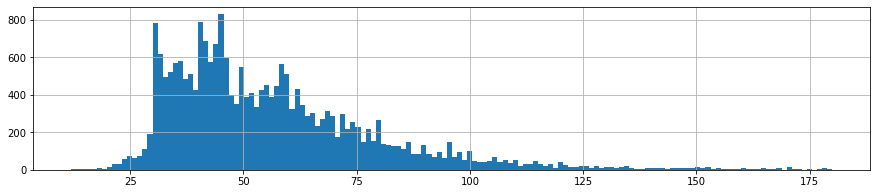

In [114]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

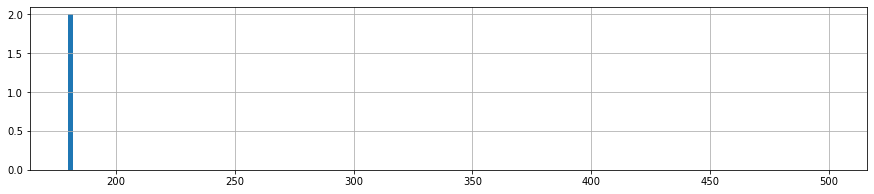

In [115]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

<a name="num3"></a>
### Посчитаем и добавим в таблицу новые столбцы

План работ:
* рассчитаю и добавлю новые столбца, а именно:
    - `'price_per_metr'` цена одного квадратного метра;
    - `'first_day_exposition_of_week'`день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - `'first_exposition_month'` месяц публикации объявления;
    - `first_exposition_year` год публикации объявления;
    - `type_of_floor` тип этажа квартиры (значения — «первый», «последний», «другой»);
    - `distance_to_center` расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
* использую следующие методы:
    - **.dt.dayofweek** (вытаскиваем день недели из даты);
    - **.dt.month** (вытаскиваем номер месяца из даты);
    - **.dt.year** (вытаскиваем год из даты);
    -  пишим функцию для опеределия типа этажа;
    -  **round()**- округление чисел.

#### Цена одного квадратного метра

In [116]:
# Рассчитаем цену м2 и добавим данные в новый столбец price_per_metr
data['price_per_metr'] = data['last_price']/data['total_area']
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center,price_per_metr
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,18863.00,16028.00,1.00,482.00,2.00,755.00,0,D,no_center_spb,120370.37
1,7,3350000.00,40.40,2018-12-04,1,2.66,11,18.60,1,False,...,12817.00,18603.00,0.00,0.00,0.00,584.50,81,B,no_center_spb,82920.79
2,10,5196000.00,56.00,2015-08-20,2,2.66,5,34.30,4,False,...,21741.00,13933.00,1.00,90.00,2.00,574.00,558,C,no_center_spb,92785.71


In [117]:
# Используем метод describe() для получение статистических значений
data['price_per_metr'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,10%,50%,60%,70%,80%,90%,95%,99%,max
index,22801.00,11664.26,6733.11,0.00,2338.00,11670.00,13998.00,16333.00,18666.00,20986.00,22157.00,23089.00,23322.00
price_per_metr,22801.00,95622.92,33884.95,10185.19,55294.12,94370.86,100574.71,108108.11,118122.98,134782.61,150840.43,198198.20,640422.35


In [118]:
#Удаляем выбросы
data = data[(data['price_per_metr'] < 320000)]

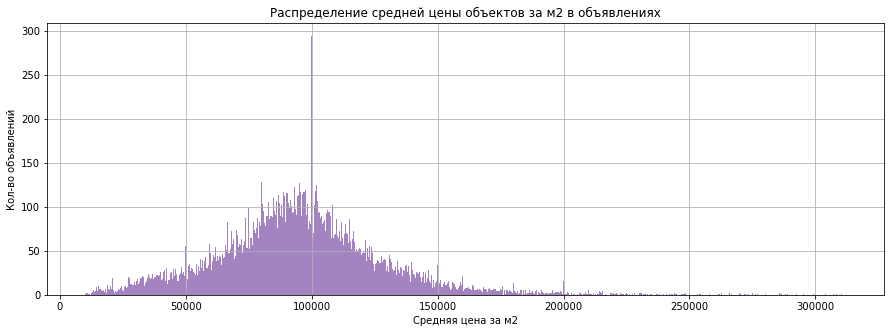

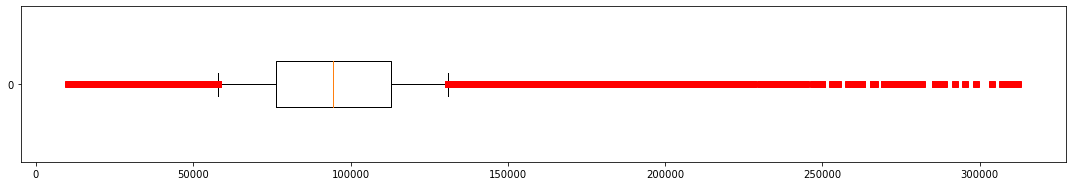

In [119]:
# Построим гистограмму
plt.figure(figsize=(15,5))
data.price_per_metr.hist(color='rebeccapurple', bins = 1000, alpha=0.6)
plt.xlabel('Средняя цена за м2')
plt.title('Распределение средней цены объектов за м2 в объявлениях')
plt.ylabel('Кол-во объявлений')
plt.show()

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['price_per_metr'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

#### День недели публикации объявления
0- понедельник
1- вторник
2- среда
3- четверг
4- пятница
5- суббота
6- воскресенье


In [120]:
# Добавим новый столбец first_day_exposition_of_week используя метод dayofweek
data['first_day_exposition_of_week'] = pd.to_datetime(data['first_day_exposition']).dt.dayofweek
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center,price_per_metr,first_day_exposition_of_week
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1.00,482.00,2.00,755.00,0,D,no_center_spb,120370.37,3
1,7,3350000.00,40.40,2018-12-04,1,2.66,11,18.60,1,False,...,18603.00,0.00,0.00,0.00,584.50,81,B,no_center_spb,82920.79,1
2,10,5196000.00,56.00,2015-08-20,2,2.66,5,34.30,4,False,...,13933.00,1.00,90.00,2.00,574.00,558,C,no_center_spb,92785.71,3


#### Месяц публикации объявления

In [121]:
# Добавим новый столбец first_exposition_month используя метод month
data['first_exposition_month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center,price_per_metr,first_day_exposition_of_week,first_exposition_month
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1.00,482.00,2.00,755.00,0,D,no_center_spb,120370.37,3,3
1,7,3350000.00,40.40,2018-12-04,1,2.66,11,18.60,1,False,...,0.00,0.00,0.00,584.50,81,B,no_center_spb,82920.79,1,12
2,10,5196000.00,56.00,2015-08-20,2,2.66,5,34.30,4,False,...,1.00,90.00,2.00,574.00,558,C,no_center_spb,92785.71,3,8


#### Год публикации объявления

In [122]:
# Добавим новый столбец first_exposition_year используя метод year
data['first_exposition_year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_split,from_center,price_per_metr,first_day_exposition_of_week,first_exposition_month,first_exposition_year
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2.00,755.00,0,D,no_center_spb,120370.37,3,3,2019
1,7,3350000.00,40.40,2018-12-04,1,2.66,11,18.60,1,False,...,0.00,0.00,584.50,81,B,no_center_spb,82920.79,1,12,2018
2,10,5196000.00,56.00,2015-08-20,2,2.66,5,34.30,4,False,...,90.00,2.00,574.00,558,C,no_center_spb,92785.71,3,8,2015


#### Тип этажа 
(значения- "первый", "последний", "другой")

In [123]:
# Добавим новый столбец number_floor и оборачиваем в функцию
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] > 1 and row['floor'] < row['floors_total']:
        return 'другой'
    elif row['floor'] > 1 and math.isnan(row['floors_total']):
        return 'другой'

In [124]:
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

In [125]:
data[['floor','floors_total', 'type_of_floor']].sample(3)

,floor,floors_total,type_of_floor
4754,19,19,последний
1554,2,5,другой
5671,5,5,последний


#### Расстояние до центра города в километрах
(переводим из м в км и округляем до целых значений)

In [126]:
# Добавим новый столбец distance_to_center используя метод round() для округления

###Сначала убери пустые значения в cityCenters_nearest

data['distance_to_center'] = np.round(data['cityCenters_nearest']/1000).astype('int')
data[['cityCenters_nearest','distance_to_center',]].head(3)

,cityCenters_nearest,distance_to_center
0,16028.00,16
1,18603.00,19
2,13933.00,14


<a name="num4"></a>
### Проведем исследовательский анализ данных

План работ:

2.3.1. Изучу, построю гистограммы и опишу все мои наблюдения  для каждого из этих параметров, а именно:
   * общая площадь;
   * жилая площадь;
   * площадь кухни;
   * цена объекта;
   * количество комнат;
   * высота потолков;
   * этаж квартиры;
   * тип этажа квартиры («первый», «последний», «другой»);
   * общее количество этажей в доме;
   * расстояние до центра города в метрах;
   * расстояние до ближайшего аэропорта;
   * расстояние до ближайшего парка;
   * день и месяц публикации объявления.
 
2.3.2. Проанализирую столбец days_exposition(срок продажи):
   * постою гистограмму;
   * рассчитаю среднюю и медианную величину;
   * разделю срок продажи на "быстрые" и "долгие".
    
2.3.3. Определю факторы влияния на общую(полную) стоимость объекта через корреляцию следующих параметров:
   * цена-общая площадь
   * цена-общая площадь
   * цена-жилая площадь
   * цена-площадь кухни
   * цена-количество комнат
   * цена-этаж
   * цена-даты размещения (день недели, месяц, год)
   
2.3.4. Проанализирую столбец locality_name:
   * посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
   * выделю населённые пункты с самой высокой и низкой стоимостью квадратного метра;
   * определю среднюю цену каждого километра в Санкт-Петербурге и опишу, как стоимость объектов зависит от расстояния до центра города.
    
Использую следующие методы:
- pivot_table(Сводные таблицы)
- groupby(группировка данных)
- hist(гистограмма)
- sort_values(сортировка данных) 

####  Изучу, построю гистограммы и опишу все мои наблюдения для каждого из этих параметров

In [127]:
# Оборачиваем график в функцию для дальнейшего использования
def building_hist(data, x_name,y_name, title):
    plt.figure(figsize=(10,5))
    data.hist(color='rebeccapurple', bins = 100, alpha=0.6 )
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.ticklabel_format(style='plain')
   
    plt.show()

**`'total_area'-общая площадь`**

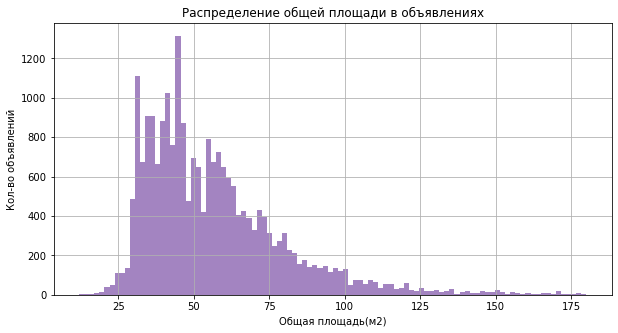

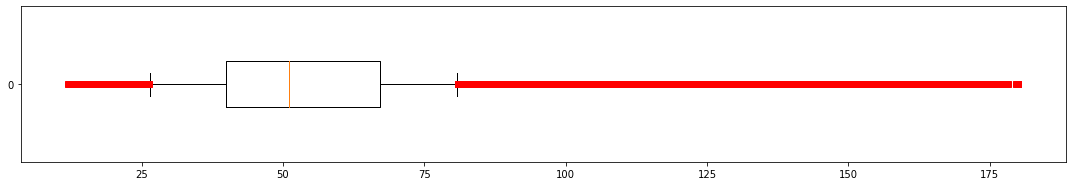

In [128]:
# Построим гистограмму
building_hist(data.total_area,'Общая площадь(м2)', 'Кол-во объявлений','Распределение общей площади в объявлениях')

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['total_area'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на общую площадь квартир от 50 до 100 м2.  

**`'living_area'-жилая площадь`**

In [129]:
data['living_area'].isna().sum()

1707

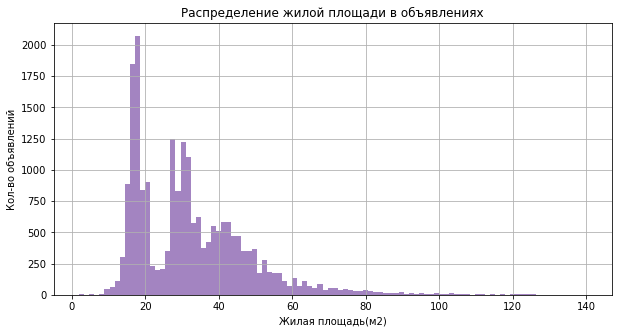

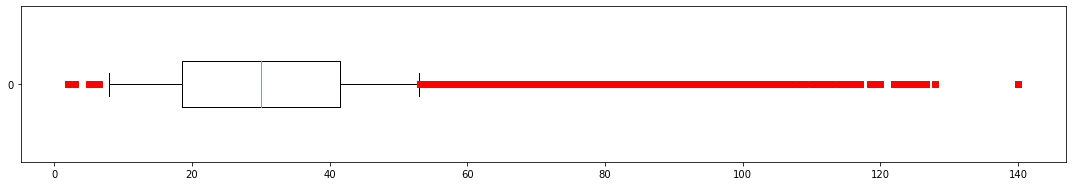

In [130]:
# Построим гистограмму
building_hist(data.living_area,'Жилая площадь(м2)', 'Кол-во объявлений','Распределение жилой площади в объявлениях')

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['living_area'].dropna(), False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на жилую площадь квартир от 30 до 50 м2. 

**`'kitchen_area'-площадь кухни`**

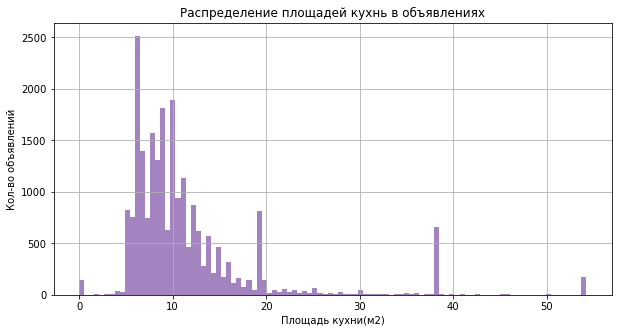

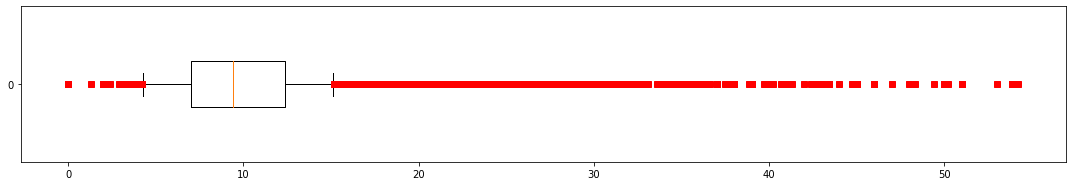

In [131]:
# Построим гистограмму
building_hist(data.kitchen_area,'Площадь кухни(м2)',\
                                'Кол-во объявлений',\
                                'Распределение площадей кухнь в объявлениях')

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['kitchen_area'].dropna(), False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на площадь кухонь от 7 до 12 м2. Есть незначительное количество объявлений, где площадь кухни от 30 до 55 м2.

**`'last_price'- цена объекта`**

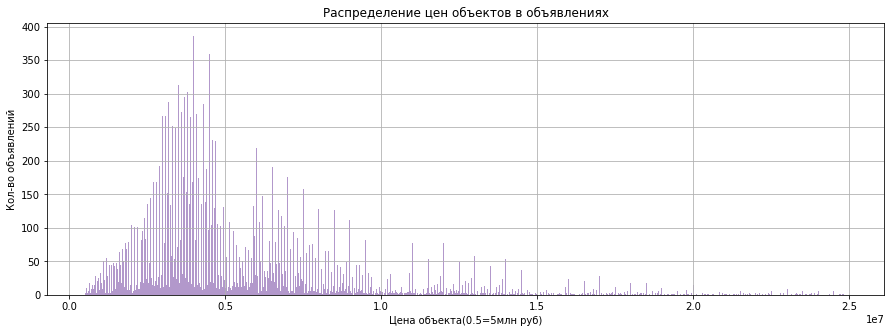

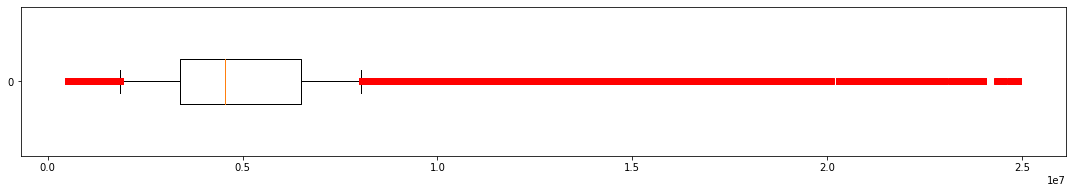

In [132]:
# Построим гистограмму
plt.figure(figsize=(15,5))
data.last_price.hist(color='rebeccapurple', bins = 1000, alpha=0.5)
plt.xlabel('Цена объекта(0.5=5млн руб)')
plt.title('Распределение цен объектов в объявлениях')
plt.ylabel('Кол-во объявлений')
plt.show()

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['last_price'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()



**Наблюдение:** На графике видно, что большая часть объявлений приходится на диапозон цен объекта в районе 5 млн рублей. Большое количество выбросов до 500К и более 250 млн р.

**`'rooms'- количество комнат`**

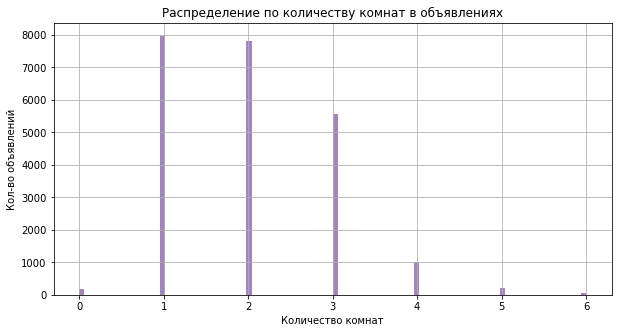

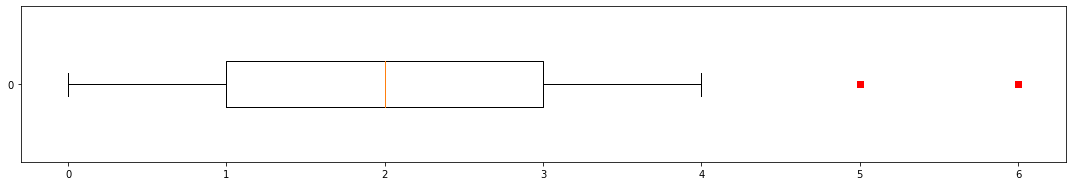

In [133]:
# Построим гистограмму
building_hist(data.rooms,'Количество комнат',\
                         'Кол-во объявлений', \
                         'Распределение по количеству комнат в объявлениях')

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['rooms'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на количество комнат до 2х комнат.

**`'ceiling_height'-высота потолков`**

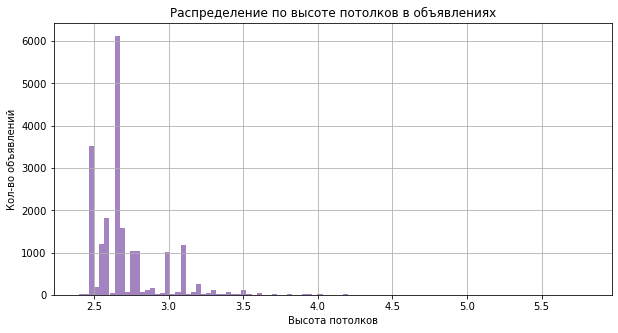

In [134]:
# Построим гистограмму
building_hist(data.ceiling_height,'Высота потолков',\
                                  'Кол-во объявлений',\
                                  'Распределение по высоте потолков в объявлениях')



**Наблюдение:** На графике видно, что большая часть объявлений приходится на высоту потолков в районе 2,7 метров. 

**`'floor'- этаж квартиры`**

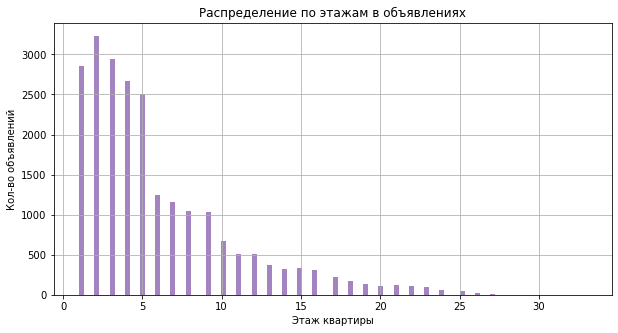

In [135]:
# Построим гистограмму
building_hist(data.floor,'Этаж квартиры', 'Кол-во объявлений', 'Распределение по этажам в объявлениях')

**Наблюдение:** На графике видно, что большая часть объявлений приходится на квартиры, расположенные на нижних этажаж( от 1 по 3).

**`type_of_floor -тип этажа квартиры («первый», «последний», «другой»)`**

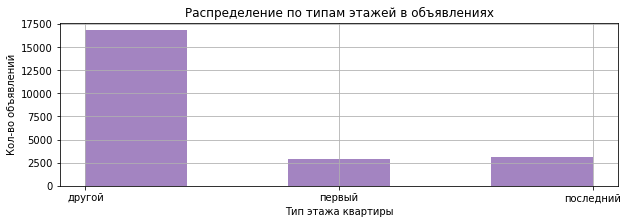

In [136]:
# Построим гистограмму
plt.figure(figsize=(10,3))
data.type_of_floor.hist(color='rebeccapurple', bins = 5, alpha=0.6)
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение по типам этажей в объявлениях')
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на квартиры, расположенные между первым и последним этажами.

**`'floors_total'- общее количество этажей в доме`**

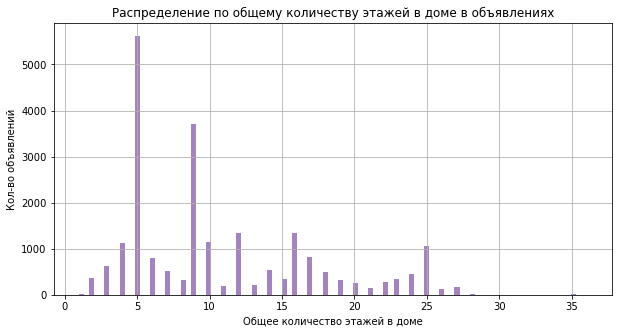

In [137]:
# Построим гистограмму
building_hist(data.floors_total,'Общее количество этажей в доме',\
                                'Кол-во объявлений',\
                                'Распределение по общему количеству этажей в доме в объявлениях')


**Наблюдение:** На графике видно, что большая часть объявлений приходится на 'этажность дома (5, 9).

**`'cityCenters_nearest' - расстояние до центра города в метрах`**

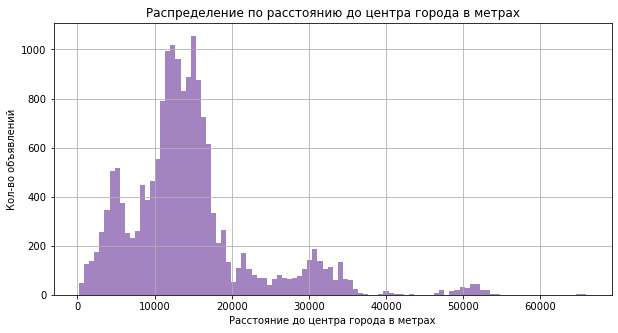

In [138]:
# Построим гистограмму

building_hist(data[data['cityCenters_nearest']>0]['cityCenters_nearest'],\
                                                  'Расстояние до центра города в метрах',\
                                                  'Кол-во объявлений', \
                                                  'Распределение по расстоянию до центра города в метрах')

**Наблюдение:** На графике видно, что большая часть объявлений приходится на квартиры, расположенные в 10-20 км от центра города. Меньше 0- заглушки

**`'airports_nearest'- расстояние до ближайшего аэропорта`**

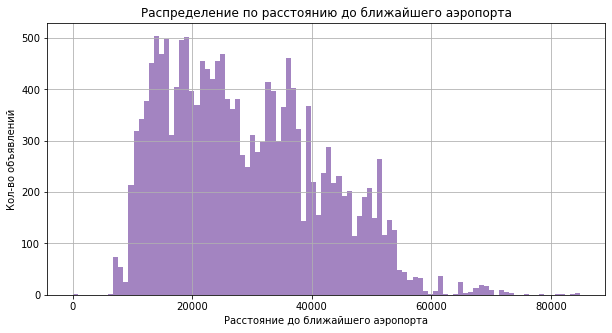

In [139]:
# Построим гистограмму
building_hist(data.airports_nearest,'Расстояние до ближайшего аэропорта',\
                                    'Кол-во объявлений', \
                                    'Распределение по расстоянию до ближайшего аэропорта')

**Наблюдение:** На графике видно, что большая часть объявлений приходится на квартиры, расположенные в районе 20 км от аэропорта.

**`parks_nearest- расстояние до ближайшего парка`**

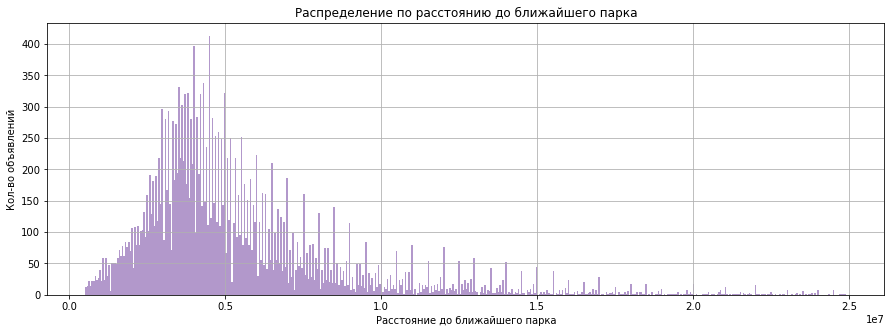

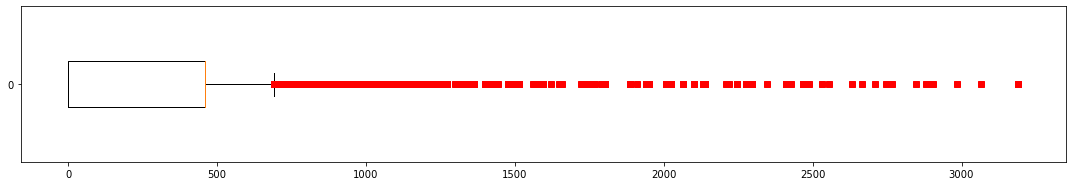

In [140]:
# Построим гистограмму
plt.figure(figsize=(15,5))
data.last_price.hist(color='rebeccapurple', bins = 500, alpha=0.5)
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение по расстоянию до ближайшего парка')
plt.show()

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['parks_nearest'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на квартиры, расположенные в районе до 500 м от парка.

**'first_day_exposition_of_week', 'first_exposition_month'`день и месяц публикации объявления`**

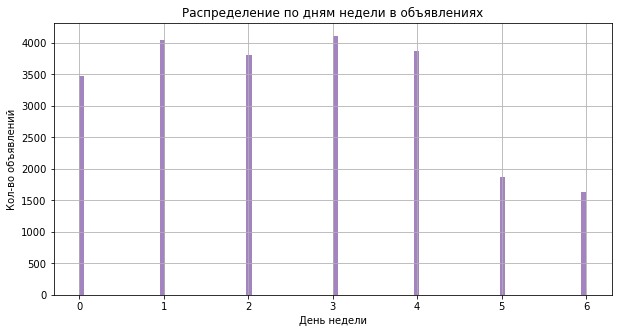

In [141]:
# Построим гистограмму
building_hist(data.first_day_exposition_of_week,'День недели', \
                                                'Кол-во объявлений',\
                                                'Распределение по дням недели в объявлениях')

**Наблюдение:** На графике видно, что большая часть объявлений приходится на будни. Незначительные пики во вторник и четверг.

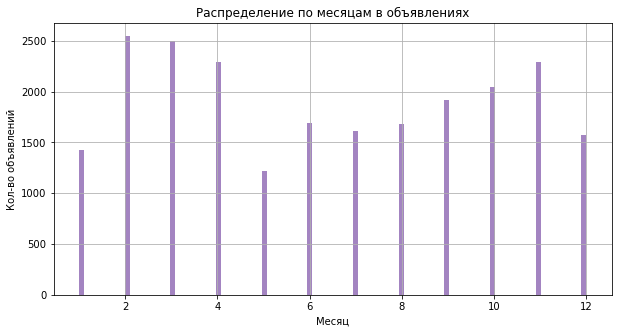

In [142]:
# Построим гистограмму
building_hist(data.first_exposition_month,'Месяц', \
                                          'Кол-во объявлений', \
                                          'Распределение по месяцам в объявлениях')

**Наблюдение:** На графике видно, что большая часть объявлений приходится на пиковые месяца- январь и ноябрь.

#### Проанализирую столбец days_exposition (длительность размещения объяления):
   * постою гистограмму и диаграмму размаха("ящик с усами");
   * проанализирую выбросы;
   * рассчитаю среднюю и медианную величину;
   * разделю срок продажи на "быстрые" и "долгие"

In [143]:
# Рассчитаю медианную величину
data['days_exposition'].median()

73.0

In [144]:
# Рассчитаю среднюю величину
data['days_exposition'].mean()

154.58055458055458

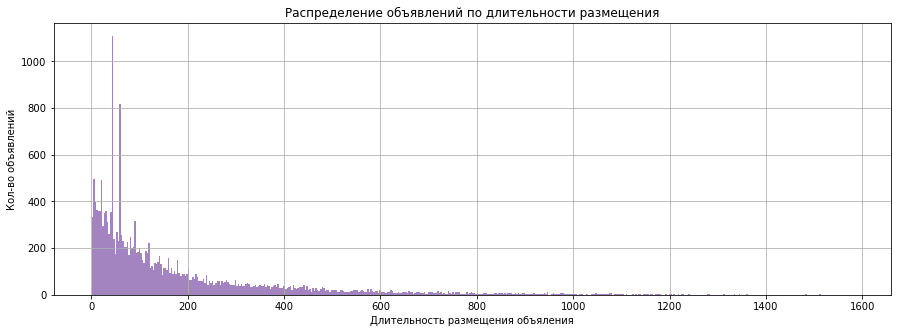

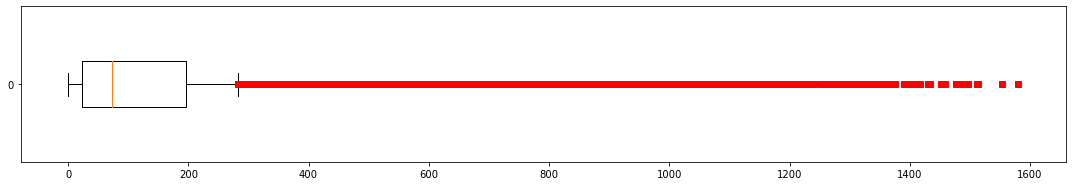

In [145]:
# Построим гистограмму
plt.figure(figsize=(15,5))

data[data['days_exposition']>0]['days_exposition'].hist(color='rebeccapurple', bins = 500, alpha=0.6)

plt.xlabel('Длительность размещения объяления')
plt.ylabel('Кол-во объявлений')
plt.title('Распределение объявлений по длительности размещения')

# Построим диаграмму размаха("ящик с усами")
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 1,2)

ax.boxplot(data['days_exposition'], False, sym='rs', vert=False, whis=0.5, positions=[0], widths=[0.3])

plt.tight_layout()
plt.show()

**Наблюдение:** На графике видно, что большая часть объявлений приходится на длительность размещения от 55 до 60 дней. Основные выбросы приходяться на длительность от 170 дней. Данные смещены в левую сторону, что говорит о быстрых продажах. 

 Разделю срок продажи на "быстрые" и "долгие"

In [146]:
 # быстрой продажей будем считать что меньше 25% и долгой, то что больше 75%

data[data['days_exposition']> 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,first_day_exposition_of_week,first_exposition_month,first_exposition_year,distance_to_center
count,19816.00,19816.00,19816.00,19816.00,17576.00,19816.00,18261.00,19816.00,19741.00,19816.00,...,15226.00,19816.00,19816.00,15178.00,19816.00,19816.00,19816.00,19816.00,19816.00,19816.00
mean,9.58,5311723.24,55.43,1.96,2.71,10.94,31.77,5.99,11.41,0.60,...,0.58,355.36,0.57,515.80,177.80,94662.96,2.58,6.59,2017.23,10.92
std,5.61,3205907.47,22.57,0.94,0.22,6.66,15.58,4.94,7.61,0.95,...,0.78,289.71,0.86,198.72,216.21,32104.75,1.78,3.49,0.96,9.92
min,0.00,520000.00,12.00,0.00,2.40,1.00,2.00,1.00,0.00,0.00,...,0.00,0.00,0.00,13.00,1.00,10185.19,0.00,1.00,2014.00,-1.00
25%,6.00,3380000.00,39.00,1.00,2.60,5.00,18.10,2.00,7.00,0.00,...,0.00,0.00,0.00,480.00,44.00,76136.36,1.00,3.00,2017.00,3.00
50%,9.00,4500000.00,50.00,2.00,2.66,9.00,29.60,4.00,9.40,0.00,...,0.00,461.00,0.00,509.00,94.00,93514.82,3.00,7.00,2017.00,12.00
75%,13.00,6300000.00,66.00,3.00,2.75,16.00,40.40,8.00,12.30,1.00,...,1.00,461.00,1.00,567.00,227.00,110966.84,4.00,10.00,2018.00,15.00
max,50.00,24900000.00,180.00,6.00,5.80,36.00,140.00,33.00,54.20,5.00,...,3.00,3190.00,3.00,1344.00,1580.00,312240.00,6.00,12.00,2019.00,66.00


In [147]:
# Добавим новый столбец days_exposition_duration и оборачиваем в функцию
def days_exposition_duration(row):
    if row['days_exposition'] < 22:
        return 'быстрые'
    elif row['days_exposition'] > 201:
        return 'долгие'
    return 'стандартные'

In [148]:
data['days_exposition_duration'] = data.apply(days_exposition_duration, axis=1)

In [149]:
data[['days_exposition','days_exposition_duration']].sample(3)

,days_exposition,days_exposition_duration
9707,133,стандартные
20061,414,долгие
13909,87,стандартные


In [150]:
# Изменение средней скорости продаж по годам

data.groupby('first_exposition_year')['days_exposition'].mean()

first_exposition_year
2014    807.23
2015    610.13
2016    314.32
2017    153.06
2018     83.51
2019     11.72
Name: days_exposition, dtype: float64

**Вывод:** Согласно таблице выше, видно, что с 2014 по 2018 год (2019 исключим из-за неполныл данных) скорость продаж увеличилась в 9 раз, что говорит о высоком спросе на рынке недвижимости. 

#### Определю факторы влияния на общую(полную) стоимость объекта через корреляцию следующих параметров:
 
   * цена-общая площадь
   * цена-жилая площадь
   * цена-площадь кухни
   * цена-количество комнат
   * цена-этаж
   * цена-даты размещения (день недели, месяц, год)
   

In [151]:
# Построим корреляционную матрицу

data_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'airports_nearest', \
                 'balcony', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'is_apartment', \
                 'locality_name', 'parks_around3000', 'parks_nearest', 'ponds_around3000',\
                 'ponds_nearest', 'total_images', 'price_per_metr','distance_to_center']].corr()
data_corr.style.background_gradient(cmap='BuPu').set_precision(2)



,last_price,total_area,living_area,kitchen_area,rooms,airports_nearest,balcony,ceiling_height,cityCenters_nearest,floor,floors_total,is_apartment,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,price_per_metr,distance_to_center
last_price,1.00,0.78,0.66,0.39,0.49,-0.03,0.04,0.48,0.03,0.09,0.11,0.02,0.18,0.33,0.30,-0.06,0.16,0.67,0.03
total_area,0.78,1.00,0.92,0.39,0.80,-0.03,0.04,0.40,-0.05,-0.03,-0.04,0.01,0.13,0.12,0.18,-0.05,0.12,0.11,-0.05
living_area,0.66,0.92,1.00,0.30,0.88,-0.05,0.00,0.36,-0.06,-0.12,-0.17,0.01,0.14,0.08,0.15,-0.04,0.10,0.01,-0.06
kitchen_area,0.39,0.39,0.30,1.00,0.17,0.02,-0.02,0.22,-0.06,0.09,0.14,0.02,0.04,0.05,0.09,-0.03,0.01,0.17,-0.06
rooms,0.49,0.80,0.88,0.17,1.00,-0.05,-0.00,0.20,-0.03,-0.16,-0.22,-0.01,0.10,0.05,0.08,-0.02,0.09,-0.11,-0.03
airports_nearest,-0.03,-0.03,-0.05,0.02,-0.05,1.00,0.05,-0.11,0.27,0.07,0.11,0.02,0.01,0.03,-0.05,0.01,-0.00,-0.04,0.27
balcony,0.04,0.04,0.00,-0.02,-0.00,0.05,1.00,-0.09,0.03,0.17,0.17,0.03,-0.08,-0.00,-0.04,0.01,0.05,0.04,0.03
ceiling_height,0.48,0.40,0.36,0.22,0.20,-0.11,-0.09,1.00,-0.22,-0.07,-0.11,0.06,0.23,0.09,0.25,-0.07,0.01,0.33,-0.22
cityCenters_nearest,0.03,-0.05,-0.06,-0.06,-0.03,0.27,0.03,-0.22,1.00,0.06,0.10,0.02,-0.14,0.37,0.20,-0.02,0.01,0.15,1.00
floor,0.09,-0.03,-0.12,0.09,-0.16,0.07,0.17,-0.07,0.06,1.00,0.68,-0.01,-0.16,0.10,-0.03,0.04,0.03,0.21,0.06


**Изучим влияние средней стомости за м2 на стоимость квартиры**

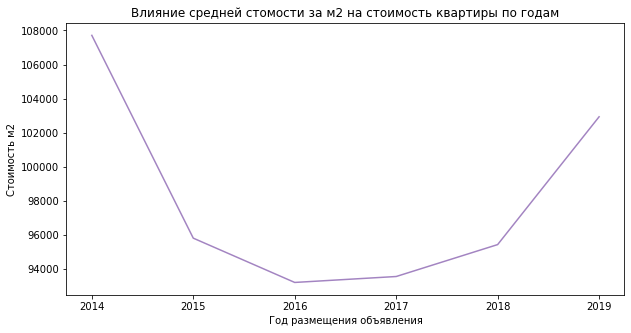

In [152]:
aver_price_year = data.groupby('first_exposition_year')['price_per_metr'].mean()
aver_price_year.plot(x = 'first_exposition_year', y = 'price_per_metr', kind = 'line', color='rebeccapurple',\
          alpha=0.6, figsize=(10,5), xlabel='Год размещения объявления', ylabel='Стоимость м2')

plt.title('Влияние средней стомости за м2 на стоимость квартиры по годам')
plt.show()

**Наблюдение:** На графике четко прослеживается падение средней стоимости за м2 с 2014 по 2015 года, стагнация с 2016 по 2017 года и резкий подъем с 2019 года.

**Изучим влияние месяца размещения на стоимость квартиры**

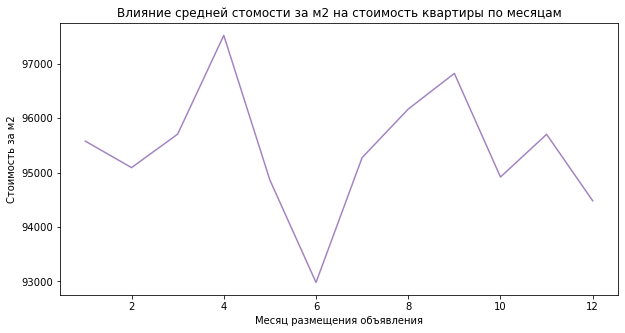

In [153]:
aver_price_month = data.groupby('first_exposition_month')['price_per_metr'].mean()

aver_price_month.plot(x = 'first_exposition_month', y = 'price_per_metr', kind = 'line', color='rebeccapurple',\
          alpha=0.6, figsize=(10,5), xlabel='Месяц размещения объявления', ylabel='Стоимость за м2')
plt.title('Влияние средней стомости за м2 на стоимость квартиры по месяцам')
plt.show()

**Наблюдение:** На графике видно, что основной пик роста средней стоимости за м2 приходит на апрель. 

In [154]:
# check
data.pivot_table(index='last_price', values=['total_area', 'living_area', 'distance_to_center',\
                                                           'rooms','kitchen_area']).reset_index()

,last_price,distance_to_center,kitchen_area,living_area,rooms,total_area
0,520000.00,-1.00,5.50,18.00,1.00,30.00
1,530000.00,-1.00,5.80,16.00,1.00,29.60
2,550000.00,-1.00,10.45,23.75,1.50,37.97
3,560000.00,-1.00,5.90,21.40,1.33,37.50
4,565000.00,-1.00,9.00,25.00,2.00,45.00
...,...,...,...,...,...,...
2585,24700000.00,4.00,22.00,60.40,3.00,94.00
2586,24719904.00,11.00,29.90,64.30,3.00,115.60
2587,24800000.00,26.00,23.00,75.00,2.00,121.30
2588,24821600.00,6.00,53.85,NaN,2.00,81.70


**Изучим влияние общей/жилой площади/площади кухни/количества комнат и расстояния от центра на стоимость квартиры**\
Напримере рассмотрим трехкомнатные квартиры и общее количество объектов

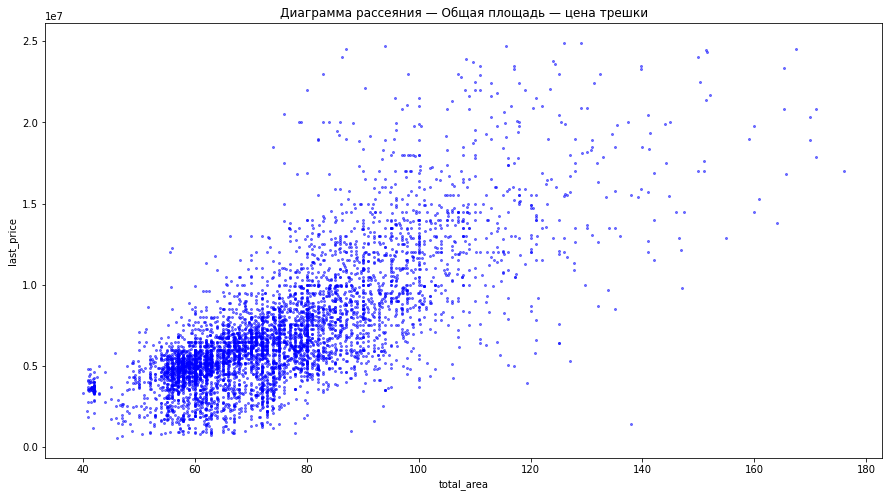

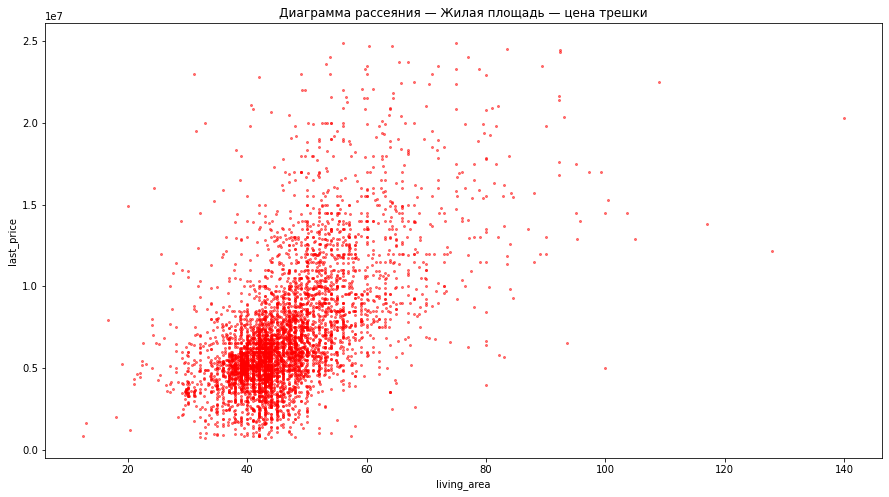

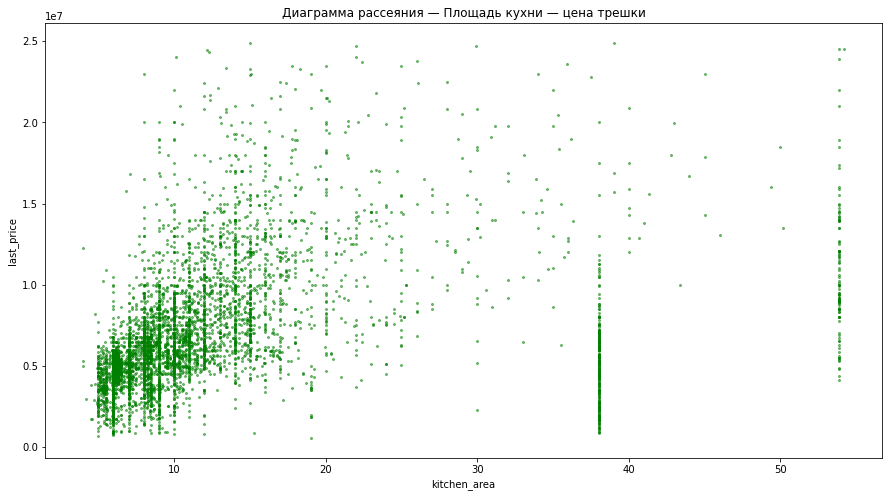

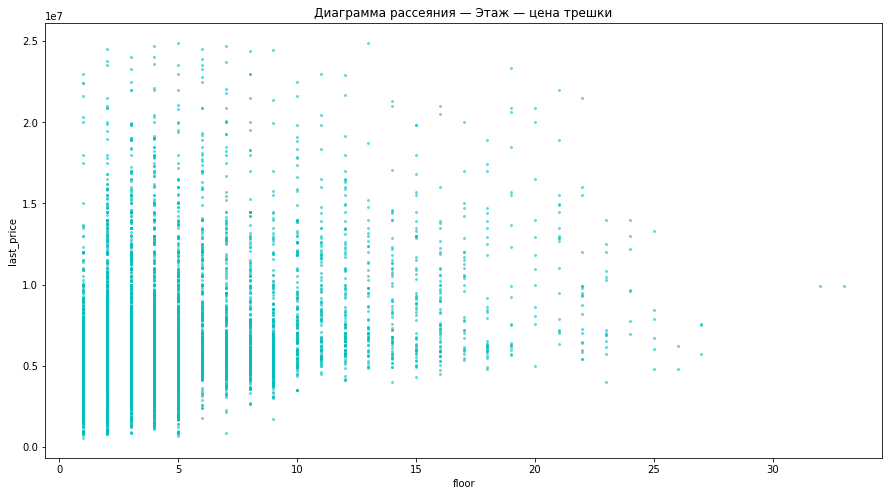

In [155]:
# цена-общая площадь
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')

# цена-жилая площадь
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

# цена-площадь кухни
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='kitchen_area', alpha=0.5, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Площадь кухни — цена трешки');

# цена-этаж
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='floor', alpha=0.5, figsize=(15,8), c = 'c', s = 4)
plt.title('Диаграмма рассеяния — Этаж — цена трешки');


**Наблюдение:** Проанализировав трехкомнахные квартиры, видна четкая зависимости цены от общей и жилой площади, а также площади кухни. 

,last_price,total_area
last_price,1.00,0.78
total_area,0.78,1.00


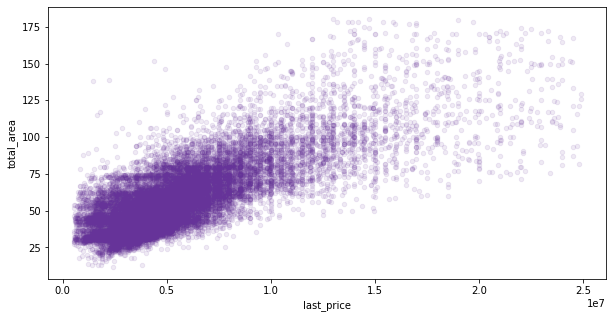

In [156]:
# Кроме этого, мы можем посмотреть зависимости цены и общей площади по всем объявлениям

data.plot(kind='scatter', x='last_price', y='total_area', figsize=(10,5), color='rebeccapurple', alpha= 0.1)
data[['last_price','total_area']].corr()

**Наблюдение:** На графике видна высокая корреляция (0.78) между стоимостью квартиры и общей площадью, \
чем больше площадь, тем выше цена. Кроме этого видны объекты с завышенами ценами. 
    

,last_price,living_area
last_price,1.00,0.66
living_area,0.66,1.00


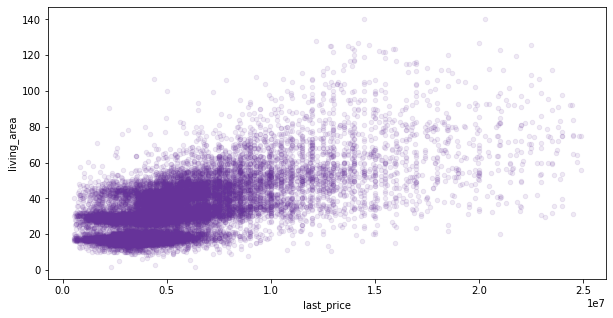

In [157]:
# мы можем посмотреть зависимости цены и жилой площади по всем объявлениям

data.plot(kind='scatter', x='last_price', y='living_area', figsize=(10,5), color='rebeccapurple', alpha= 0.1)
data[['last_price','living_area']].corr()

**Наблюдение:** На графике видна заметная корреляция (0.67) между стоимостью квартиры и жилой площадью. 

,last_price,kitchen_area
last_price,1.00,0.39
kitchen_area,0.39,1.00


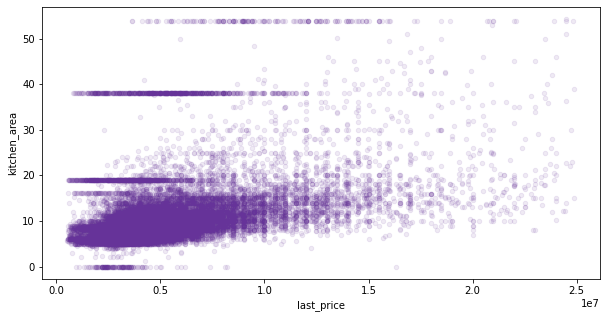

In [158]:
# Кроме этого,мы можем посмотреть зависимости цены и площади кухни по всем объявлениям

data.plot(kind='scatter', x='last_price', y='kitchen_area', figsize=(10,5), color='rebeccapurple', alpha= 0.1)
data[['last_price','kitchen_area']].corr()

**Наблюдение:** На графике видна заметная корреляция (0.59) между стоимостью квартиры и  площадью кухнию. 

,last_price,rooms
last_price,1.00,0.49
rooms,0.49,1.00


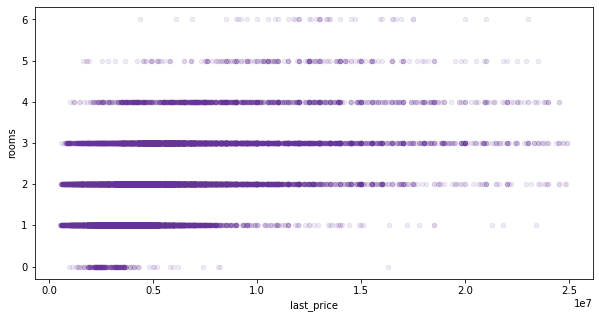

In [159]:
# Мы можем посмотреть зависимости цены и количества комнат по всем объявлениям

data.plot(kind='scatter', x='last_price', y='rooms', figsize=(10,5), color='rebeccapurple', alpha= 0.1)
data[['last_price','rooms']].corr()

**Наблюдение:** На графике видна умеренная корреляция (0.48) между стоимостью квартиры и  количеством комнат. 

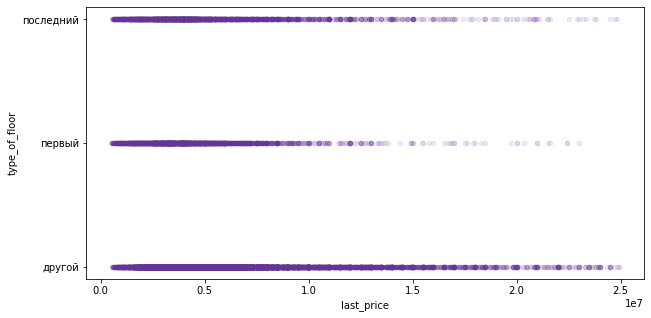

In [160]:

# Мы можем посмотреть зависимости цены и типа этажа по всем объявлениям

data.plot(kind='scatter', x='last_price', y='type_of_floor', figsize=(10,5), color='rebeccapurple', alpha= 0.1)
plt.show()

**Наблюдение:** На графике видно, что квартиры на первом этаже значительно дешевле, чем квартиры расположенные между первым и последним этажами.  

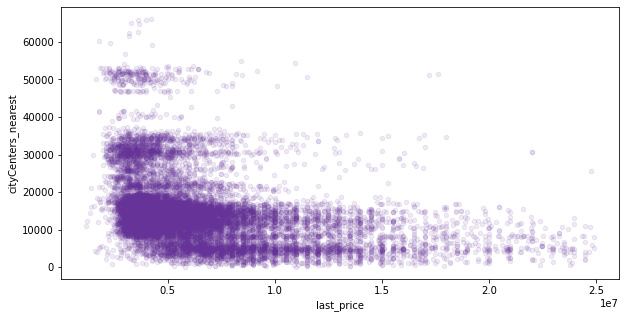

In [161]:
# Мы можем посмотреть зависимость цены и удаленности от центра по всем объявлениям

data[data['cityCenters_nearest']>0].plot(kind='scatter', x='last_price', y='cityCenters_nearest', figsize=(10,5),\
          color='rebeccapurple', alpha= 0.1)
plt.show()


**Наблюдение:** На графике видно, чем ближе к центру, тем дороже.

#### Проанализирую столбец locality_name:

   * посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
   * выделю населённые пункты с самой высокой стоимостью квадратного метра;

In [162]:

cities_top10 = data.pivot_table(index='locality_name', values= 'price_per_metr', aggfunc=['mean', 'count'])

cities_top10.columns = ['price_per_metr_mean', 'total_flats']

price_for_cities_top10 = cities_top10.sort_values(by= 'total_flats', ascending = False).head(10)

price_for_cities_top10.sort_values(by= 'price_per_metr_mean', ascending = False)


,price_per_metr_mean,total_flats
locality_name,,
Санкт-Петербург,109497.64,14963
Пушкин,102230.36,358
деревня Кудрово,92473.55,299
поселок Парголово,90332.26,326
поселок Мурино,85588.35,549
поселок Шушары,78551.34,439
Колпино,75333.30,337
Гатчина,68757.68,306
Всеволожск,67321.03,395


* выделю населённые пункты с самой низкой стоимостью квадратного метра
 

In [163]:
price_for_cities_low10 = cities_top10.sort_values(by= 'total_flats', ascending = True).head(10)

price_for_cities_low10.sort_values(by= 'price_per_metr_mean', ascending = True)

,price_per_metr_mean,total_flats
locality_name,,
деревня Пельгора,18269.23,1
деревня Мануйлово,24476.99,1
поселок Коммунары,25139.66,1
поселок Каложицы,26715.69,1
деревня Меньково,28828.83,1
поселок Кирпичное,33105.02,1
село Шум,33898.31,1
деревня Мины,35714.29,1
деревня Нижние Осельки,39864.86,1


* построю график распределения цены за м2 по населенным пунктам;

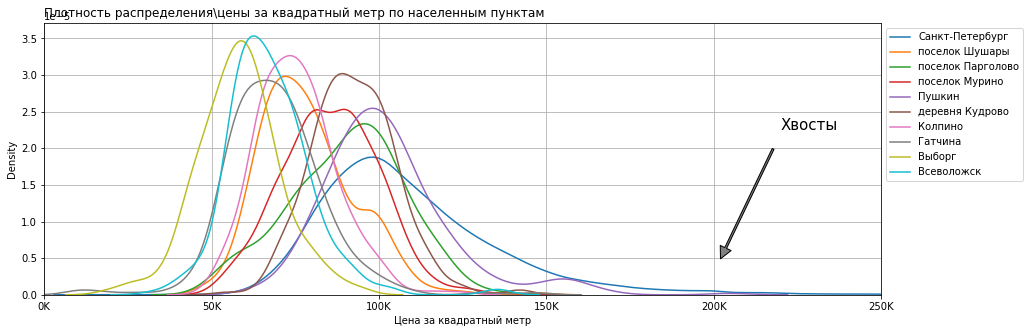

In [164]:
fig, ax = plt.subplots(figsize=(15, 5)) 
# 10 населённых пунктов с наибольшим числом объявлений

data_top_places = data[data.locality_name.isin(data.locality_name.value_counts().index[:10])]
# Пишем функцию
for locality in data_top_places.locality_name.unique():
    sns.kdeplot(data_top_places[data_top_places.locality_name == locality].price_per_metr, label = locality)
    
plt.grid(True) # сетка
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1)) # положение легенды
plt.title('Плотность распределения\цены за квадратный метр по населенным пунктам', loc = 'left') # название графика
plt.xlabel('Цена за квадратный метр') # подпись оси x
plt.xlim((0,250000)) # ограничение значений оси X
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'K')) # форматирование подписей на оси X
plt.annotate('Хвосты', size = 15, xy = (200000, 0.000003), xytext = (220000, 0.0000225), 
             arrowprops = dict(facecolor = 'gray', shrink = 0.1, width = 2)) # аннотация графика с заданной позицией
plt.show()

**Наблюдение:** Выбрав топ 10 населенных пунктов со средней стоимостью за м2, мы видим, что цена находится в диапазоне 70К-120К в зависимости от места. Максимум в пунктах- Санкт-Петербург, Пушкин, Сестрорецк. Также есть выбросы от 200К.

**`Определю среднюю цену каждого километра в Санкт-Петербурге и опишу, как стоимость объектов зависит от расстояния до центра города.`**

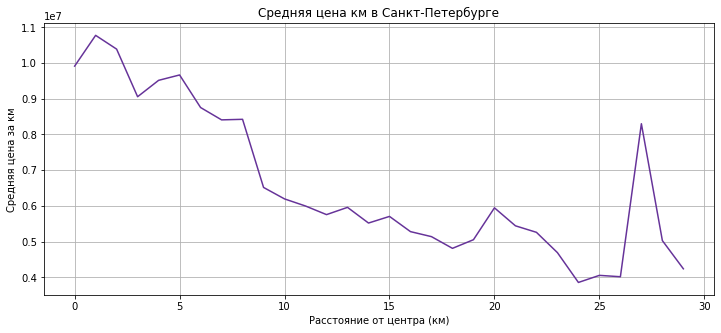

In [171]:
# Сортируем по городу, расстоянию и цене
data_spb_mean = data.query('locality_name =="Санкт-Петербург" & distance_to_center >= 0 ') \
                     .groupby('distance_to_center')['last_price'].mean()\
                     .plot(grid=True, figsize=(12, 5), color='rebeccapurple')

plt.title('Средняя цена км в Санкт-Петербурге') # название графика
plt.xlabel('Расстояние от центра (км)') # подпись оси x
plt.ylabel('Средняя цена за км')
plt.show()


**Наблюдение:** На графике четко видна корреляция между стоимостью квартиры и расстоянием до центра. Чем ближе к центру, тем дороже.

### Общий вывод

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> 
    
- Изучив данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет было выявлено следующее:

* Основные аномалии были определены по причине некорректно введенных данных самими пользователями, а именно:
    - высота потолков(проставлялись значения без ".") 
    - стоимость квартиры (выбросы до 500К и более 250 млн руб)
Кроме этого, значительная часть данных(более 20%) отсутствовала в значениях- высота поталков, тип квартира-апартаменты, наличие балкона.

- Если в данных наблюдались пропуски, они заменялись на среднию или медианную величину в разрезе каждого типа данных. Если данные не были найдены через уникальные значения, они обнулялись или удалялись, в зависимости от влияния на статистику. Часть данных, в основном, которая была получена картографическим путем не трогалась, если нельзя было их заменить через функции в разрезе названия населенного пункта. 

- Высокую корреляционную зависимость можно увидеть между last_price- rooms, rooms-total_area, total_area-living_area, kitchen_area-total_area и last_price-distance_to_center

- Выбрав топ 10 населенных пунктов со средней стоимостью за м2, мы видим, что цена находится в диапазоне 70К-120К в зависимости от места. Максимум в пунктах- Санкт-Петербург, Пушкин, Сестрорецк.

- Кроме этого, проанализировав динамику средней цены за м2 по годам, четко прослеживается падение средней стоимости за м2 с 2014 по 2015 года, стагнация с 2016 по 2017 года и резкий подъем с 2019 года.
    
</b>